In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv("Used_Bikes.csv")
df1.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
# df1['brand'].unique()

In [4]:
df1.shape

(32648, 8)

In [5]:
df1.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [6]:
df1['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

In [7]:
df1['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [9]:
df1['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

In [10]:
df1['city'].value_counts()

Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: city, Length: 443, dtype: int64

In [11]:
df1.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [12]:
sns.set(rc={'figure.figsize':(9,7)})

<AxesSubplot:xlabel='price'>

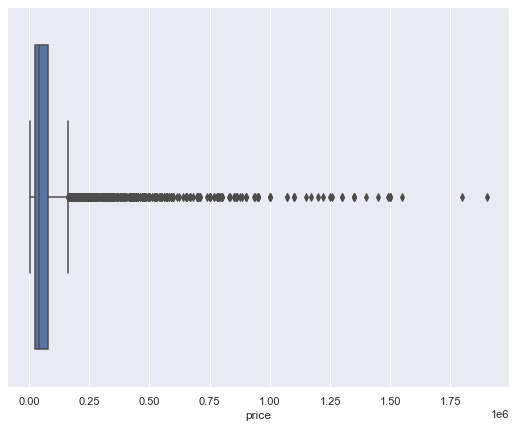

In [13]:
sns.boxplot(data=df1, x = 'price')

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

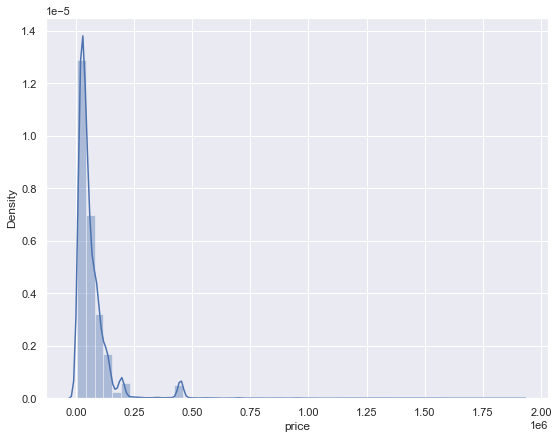

In [14]:
sns.distplot(df1['price'])

<AxesSubplot:xlabel='kms_driven'>

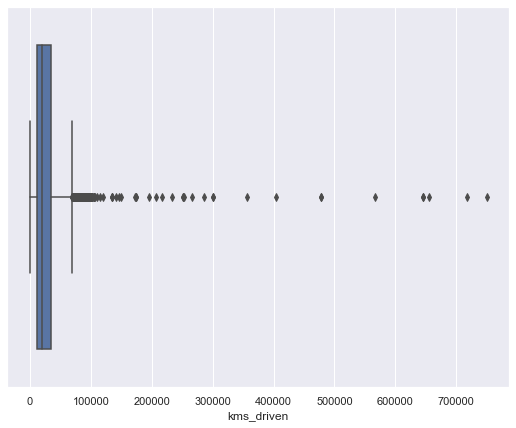

In [15]:
sns.boxplot(data=df1, x='kms_driven')

<AxesSubplot:xlabel='age'>

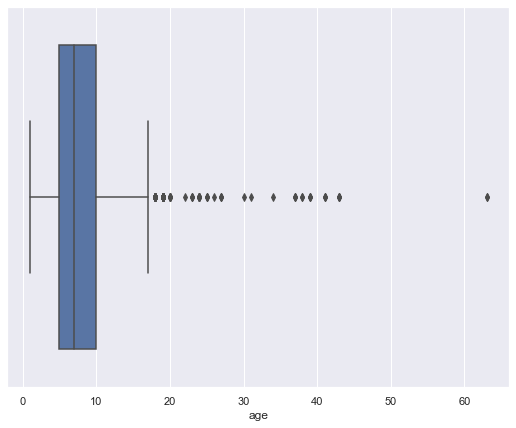

In [16]:
sns.boxplot(data=df1, x='age')

<AxesSubplot:xlabel='power'>

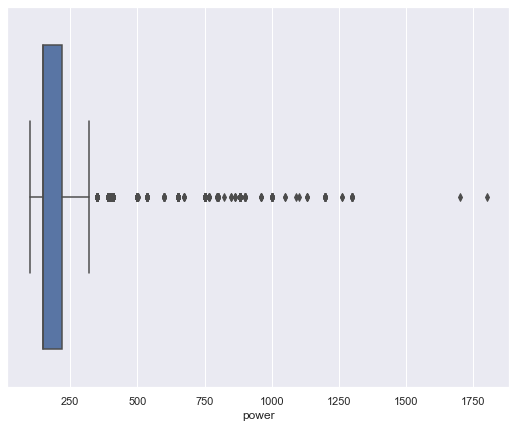

In [17]:
sns.boxplot(data=df1, x='power')

In [18]:
df1['age'] = df1['age'].astype('int32')
df1['power'] = df1['power'].astype('int32')

In [19]:
df1.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [20]:
def remove_outliers(column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Create a boolean mask that is True for values that are within 1.5 times the IQR of the 25th and 75th percentiles
    mask = (df1[column] >= Q1 - 1.5 * IQR) & (df1[column] <= Q3 + 1.5 * IQR)
    
    df = df1[mask]
    return df

In [21]:
def replace_outliers_with_iqr(data, factor=1.5):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data[data < lower_bound] = lower_bound
    data[data > upper_bound] = upper_bound
    return data

In [22]:
df1 = remove_outliers('age')

In [23]:
df1.shape

(31963, 8)

In [24]:
df1 = remove_outliers('power')

In [25]:
df1.shape

(25346, 8)

In [26]:
df1 = remove_outliers('kms_driven')

In [27]:
df1.shape

(25259, 8)

In [28]:
df1['price'] = replace_outliers_with_iqr(df1['price'], factor=1.5)

C:\Users\patil\AppData\Local\Temp\ipykernel_11600\3159461166.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > upper_bound] = upper_bound


In [29]:
df1.shape

(25259, 8)

In [30]:
df1.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3,110,TVS
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3,150,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6,150,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3,160,Honda


In [31]:
df1['owner'].value_counts()

First Owner             24065
Second Owner             1118
Third Owner                71
Fourth Owner Or More        5
Name: owner, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le_owner=LabelEncoder()

In [33]:
df1['Owner_Type']=le_owner.fit_transform(df1['owner'])
df1.head(5)

,bike_name,price,city,kms_driven,owner,age,power,brand,Owner_Type
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3,110,TVS,0
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4,180,TVS,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3,150,Yamaha,0
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6,150,Yamaha,0
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3,160,Honda,0


In [34]:
df1[df1['owner']=='Fourth Owner Or More']

,bike_name,price,city,kms_driven,owner,age,power,brand,Owner_Type
3637,Bajaj Pulsar 150cc,11000.0,Bangalore,58000.0,Fourth Owner Or More,14,150,Bajaj,1
4120,Bajaj Avenger 220cc,37000.0,Ahmedabad,30334.0,Fourth Owner Or More,7,220,Bajaj,1
5221,Yamaha Gladiator 125cc,20000.0,Bangalore,38500.0,Fourth Owner Or More,12,125,Yamaha,1
5456,Yamaha Gladiator 125cc,20000.0,Bangalore,38500.0,Fourth Owner Or More,12,125,Yamaha,1
9028,Hero Passion Plus 100cc,23000.0,Anantnag,2009.0,Fourth Owner Or More,12,100,Hero,1


In [35]:
print(le_owner.classes_)

['First Owner' 'Fourth Owner Or More' 'Second Owner' 'Third Owner']


In [36]:
df1.drop(columns=['owner'], inplace=True)

In [37]:
# df1['owner'] = df1['owner'].replace("First Owner", 1)
# df1['owner'] = df1['owner'].replace("Second Owner", 2)
# df1['owner'] = df1['owner'].replace("Third Owner", 3)
# df1['owner'] = df1['owner'].replace("Fourth Owner Or More", 4)

In [38]:
df1.head()

,bike_name,price,city,kms_driven,age,power,brand,Owner_Type
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,3,110,TVS,0
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,4,180,TVS,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,3,150,Yamaha,0
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,6,150,Yamaha,0
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,3,160,Honda,0


In [39]:
brands = ['TVS', 'Yamaha', 'Honda', 'Hero', 'Bajaj', 'Suzuki', 'Benelli',
       'KTM', 'Mahindra', 'Hyosung', 'Jawa', 'BMW', 'Kawasaki', 'LML',
       'Harley-Davidson']

In [40]:
df1['brand'].value_counts()

Bajaj              10445
Hero                5724
Yamaha              3893
Honda               2082
Suzuki              1451
TVS                 1233
KTM                  247
Mahindra              55
Benelli               42
Hyosung               40
Kawasaki              23
BMW                   12
Jawa                  10
LML                    1
Harley-Davidson        1
Name: brand, dtype: int64

In [41]:
brand_df = pd.get_dummies(df1['brand'])
df1 = pd.concat([df1, brand_df], axis=1)

In [42]:
df1.head()

,bike_name,price,city,kms_driven,age,power,brand,Owner_Type,BMW,Bajaj,...,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,3,110,TVS,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,4,180,TVS,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,3,150,Yamaha,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,6,150,Yamaha,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,3,160,Honda,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
df1.drop(columns=['bike_name'], inplace=True)

In [44]:
y = df1[['price']]
df1.pop('price')

0        35000.0
3        65000.0
4        80000.0
5        53499.0
6        85000.0
          ...   
32643    39000.0
32644    30000.0
32645    60000.0
32646    15600.0
32647    22000.0
Name: price, Length: 25259, dtype: float64

In [45]:
df1

,city,kms_driven,age,power,brand,Owner_Type,BMW,Bajaj,Benelli,Harley-Davidson,...,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
0,Ahmedabad,17654.0,3,110,TVS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Bangalore,16329.0,4,180,TVS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Bangalore,10000.0,3,150,Yamaha,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Delhi,25000.0,6,150,Yamaha,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Delhi,8200.0,3,160,Honda,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,Delhi,22000.0,4,100,Hero,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,Karnal,6639.0,9,180,TVS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32645,Delhi,20373.0,6,220,Bajaj,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,Jaipur,84186.0,16,125,Hero,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df1.drop(columns=['city'], inplace=True)

In [47]:
df1.head()

,kms_driven,age,power,brand,Owner_Type,BMW,Bajaj,Benelli,Harley-Davidson,Hero,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
0,17654.0,3,110,TVS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16329.0,4,180,TVS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10000.0,3,150,Yamaha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,25000.0,6,150,Yamaha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,8200.0,3,160,Honda,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
df1.drop(columns=['brand'], inplace=True)

In [49]:
df1.head()

,kms_driven,age,power,Owner_Type,BMW,Bajaj,Benelli,Harley-Davidson,Hero,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
0,17654.0,3,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16329.0,4,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10000.0,3,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,25000.0,6,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,8200.0,3,160,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
X = df1

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
nums_vars = df1.columns

In [54]:
ss = StandardScaler()
X_train[nums_vars] = ss.fit_transform(X_train[nums_vars])
X_test[nums_vars] = ss.transform(X_test[nums_vars])


In [55]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

-0.00015837820467612396
4756731697814.637
1.428863245449029e+29


In [56]:
rfr  = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(r2_score(y_pred_rfr, y_test))
print(mean_absolute_error(y_pred_rfr, y_test))
print(mean_squared_error(y_pred_rfr, y_test))
print(np.sqrt(mean_squared_error(y_pred_rfr, y_test)))

C:\Users\patil\AppData\Local\Temp\ipykernel_11600\2486515246.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.9582861230147472
1724.5863025616418
24347090.027520444
4934.27705216483


In [57]:
xg  = XGBRegressor()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print(r2_score(y_pred_xg, y_test))
print(mean_absolute_error(y_pred_xg, y_test))
print(mean_squared_error(y_pred_xg, y_test))
print(np.sqrt(mean_squared_error(y_pred_xg, y_test)))

0.9585714914475519
1893.8396742626683
23928848.25618799
4891.712200874862


Text(0, 0.5, 'y_pred')

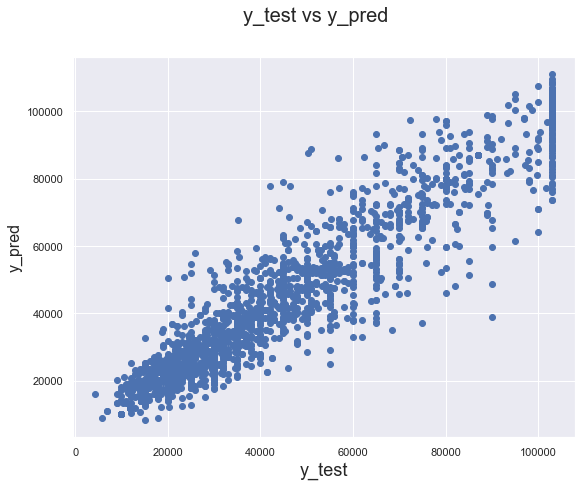

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred_xg)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label

In [59]:
X_train.head()

,kms_driven,age,power,Owner_Type,BMW,Bajaj,Benelli,Harley-Davidson,Hero,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
29195,-1.209544,2.074473,-1.341308,-0.221308,-0.022982,-0.841458,-0.039156,-0.007266,1.858848,-0.298934,-0.041135,-0.019226,-0.096838,-0.02815,0.0,-0.04825,-0.247805,-0.228113,-0.428435
12871,1.154087,0.458534,-0.221143,-0.221308,-0.022982,-0.841458,-0.039156,-0.007266,-0.537968,-0.298934,-0.041135,-0.019226,-0.096838,-0.02815,0.0,-0.04825,-0.247805,-0.228113,2.334079
21489,-0.278696,-0.080112,-1.341308,-0.221308,-0.022982,-0.841458,-0.039156,-0.007266,1.858848,-0.298934,-0.041135,-0.019226,-0.096838,-0.02815,0.0,-0.04825,-0.247805,-0.228113,-0.428435
15030,0.368354,1.805150,-0.221143,-0.221308,-0.022982,1.188413,-0.039156,-0.007266,-0.537968,-0.298934,-0.041135,-0.019226,-0.096838,-0.02815,0.0,-0.04825,-0.247805,-0.228113,-0.428435
9893,0.031177,-0.349435,1.347088,-0.221308,-0.022982,1.188413,-0.039156,-0.007266,-0.537968,-0.298934,-0.041135,-0.019226,-0.096838,-0.02815,0.0,-0.04825,-0.247805,-0.228113,-0.428435


In [60]:
brands = X_train.columns[4:]

First - 0

Fourth - 1

Second - 2

Third - 3

In [61]:
def new_input(kms_driven, age, power, owner, brand):
    owner_val = 0
    owner = owner.lower()
    if owner=='first':
        owner_val = 0
    elif owner=='fourth or more':
        owner_val = 1
    elif owner=='second':
        owner_val = 2
    else:
        owner_val = 3
    
    brand_occur_df = pd.DataFrame(0, index=[0], columns=brands)
    bike_list = [brand]
    for bike in bike_list:
        if bike in brand_occur_df.columns:
            brand_occur_df.loc[0, bike] = 1
    
    new_inp = {
        'kms_driven': kms_driven,
        'age': age,
        'power': power,
        'Owner_Type': owner_val
    }

    new_df = pd.DataFrame([new_inp])
    
    final_df = pd.concat([new_df, brand_occur_df], axis=1)
    final_df  = ss.transform(final_df)
    y_pred_new = rfr.predict(final_df)
    return y_pred_new

    

In [67]:
new_input(30000, 2, 155, 'third', "Kawasaki")[0]

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


68295.0

In [63]:
X.head()

,kms_driven,age,power,Owner_Type,BMW,Bajaj,Benelli,Harley-Davidson,Hero,Honda,Hyosung,Jawa,KTM,Kawasaki,LML,Mahindra,Suzuki,TVS,Yamaha
0,17654.0,3,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16329.0,4,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10000.0,3,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,25000.0,6,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,8200.0,3,160,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
# import pickle
# with open('rfr_bike.pkl', 'wb') as file:
#     pickle.dump(rfr, file)

In [66]:
import pickle
with open('scaler_bike.pkl', 'wb') as file:
    pickle.dump(ss, file)

with open('brands_bike.pkl', 'wb') as file:
    pickle.dump(brands, file)

In [65]:
brands

Index(['BMW', 'Bajaj', 'Benelli', 'Harley-Davidson', 'Hero', 'Honda',
       'Hyosung', 'Jawa', 'KTM', 'Kawasaki', 'LML', 'Mahindra', 'Suzuki',
       'TVS', 'Yamaha'],
      dtype='object')